# Introducción


![](img/Diagrama.jpg)

# Bibliografía

**Deep Learning**, Ian Goodfellow
http://www.deeplearningbook.org/

**Pattern Recognition and Machine Learning**, M.Bishop: 
http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf


# Aprendizaje máquina vs Minería de Datos vs Estadística


## Estadística

En estadística vimos como realizar un análisis exploratorio de datos. Sabemos usar:
* Histogramas/Curvas de probabilidad/Kernel density estimation
* Diagramas de cajas (Boxplot)
* Comparar poblaciones: Tests estadísticos
* Entender como afectan una o varias variables a nuestros datos: Test estadísticos y regresiones

Siempre analizabamos el 100% de nuestros datos. Obteníamos una descripción detallada de nuestra población.
No haciamos predicciones

## Minería de datos

Utilizado para extraer información, conocimiento, útil de los datos en bruto.

## Aprendizaje máquina

En el aprendizaje máquina tenemos algoritmos que dados unos datos de entrada, es capaz de *aprender* como se comportan esos datos en función de los parámetros de entrada. 

El objetivo **no** es entender como afecta una variable o varias variables a nuestros datos.

El **objetivo** es **generalizar** el problema. Cuando llegue una variable con un valor que no ha visto nunca antes, es capaz de hacer una **estimación** lo suficientemente correcta.

### Aprendizaje supervisado


En el aprendizaje supervisado nosotros enseñamos entradas y salidas. 

El algoritmo creará una **función** a partir de esos ejemplos. Este proceso se llama **entrenamiento**. El entrenamiento donde el algoritmo aprende.

Cuando le damos **datos nuevos**, una **función entrenada** nos dará el resultado correcto. 


![](./img/CajaNegra.png)



#### Ejemplo de aprendizaje supervisado

Recordemos de estadística lo que era una regresión lineal:

Es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, las variables independientes $X_i$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
Y=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p+\varepsilon = \sum \beta_k X_k+\varepsilon
\\]

Un modelo de aprendizaje supervisado va a aprender de unos ejemplos que le pasemos de la forma más general posible. Así la próxima vez que le mostremos datos nuevos dará un resultado confiable.

In [1]:
library("dslabs")

Vamos a simular que soltamos un objeto desde lo alto de la torre de Pisa (55.86m) y medimos la distancia hasta al suelo que ese objeto presenta pasados $t$ segundos.

Evientemente, nuestras medidas tendrán un error, por eso vamos a tomar varias medidas y repetir el experimento varias veces.

In [2]:
data_train<-rfalling_object(n = 10)[c("time","observed_distance")]
head(data_train)

,time,observed_distance
,<dbl>,<dbl>
1,0.0000000,55.75851
2,0.3611111,54.06323
3,0.7222222,55.17155
4,1.0833333,48.91636
5,1.4444444,46.11598
6,1.8055556,40.09793


In [3]:
data_train<-rbind(data_train,rfalling_object(n = 5)[c("time","observed_distance")])
data_train<-rbind(data_train,rfalling_object(n = 7)[c("time","observed_distance")])
data_train<-rbind(data_train,rfalling_object(n = 20)[c("time","observed_distance")])

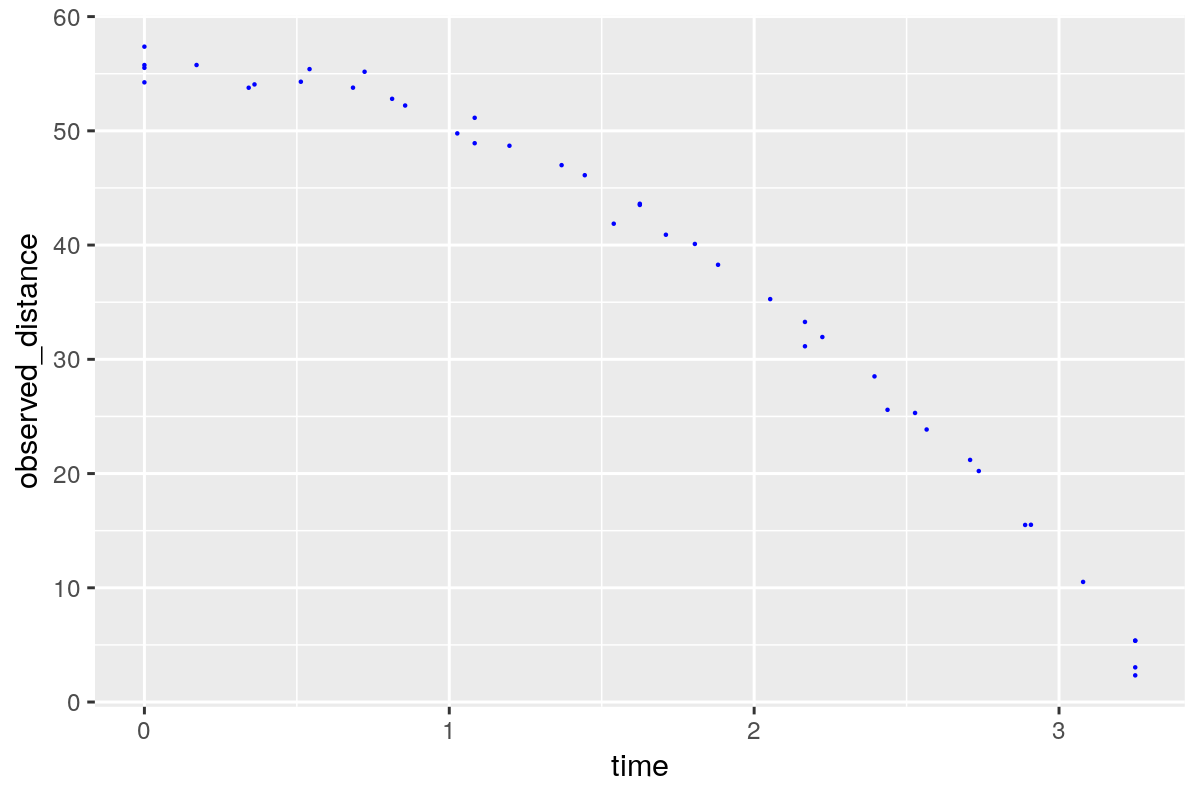

In [8]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)

ggplot(data_train,aes(x=time,y=observed_distance))+geom_point(size=0.1,color="blue")

In [14]:
model<-lm(formula=observed_distance~I(time^2), data=data_train)
summary(model)


Call:
lm(formula = observed_distance ~ I(time^2), data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3522 -0.5372  0.2011  0.6803  1.9911 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 55.70836    0.22802   244.3   <2e-16 ***
I(time^2)   -4.84637    0.04471  -108.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.013 on 40 degrees of freedom
Multiple R-squared:  0.9966,	Adjusted R-squared:  0.9965 
F-statistic: 1.175e+04 on 1 and 40 DF,  p-value: < 2.2e-16


En este caso estamos tratando de mejorar el error cuadrático medio:

Estamos tratando de minimizar la función de error.

In [15]:
sqrt(mean((data_train$observed_distance-model$fitted.values)^2))

[1] 0.9887407

La próxima vez que tengamos datos nuevos, podremos realizar una estimación del resultado esperado.

In [19]:
data_test<-data.frame(time=c(1,3,5))
data_test$dist<-predict(model,data_test)
data_test

time,dist
<dbl>,<dbl>
1,50.86198
3,12.09099
5,-65.45099


Pero atentos, el modelo solo puede generalizar cuando los datos son parecidos a los que hemos visto. 

Aquí el modelo falla en predecir que una vez que el objeto toca el suelo no va a seguir cayendo.

### Aprendizaje NO supervisado 

Encuentra estructuras en los datos sin necesidad de intervención externa.

Nos puede servir para agrupar datos por similitud.

In [20]:
head(olive)

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Southern Italy,North-Apulia,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
2,Southern Italy,North-Apulia,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
3,Southern Italy,North-Apulia,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
4,Southern Italy,North-Apulia,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
5,Southern Italy,North-Apulia,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
6,Southern Italy,North-Apulia,9.11,0.49,2.68,79.24,6.78,0.51,0.70,0.44


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



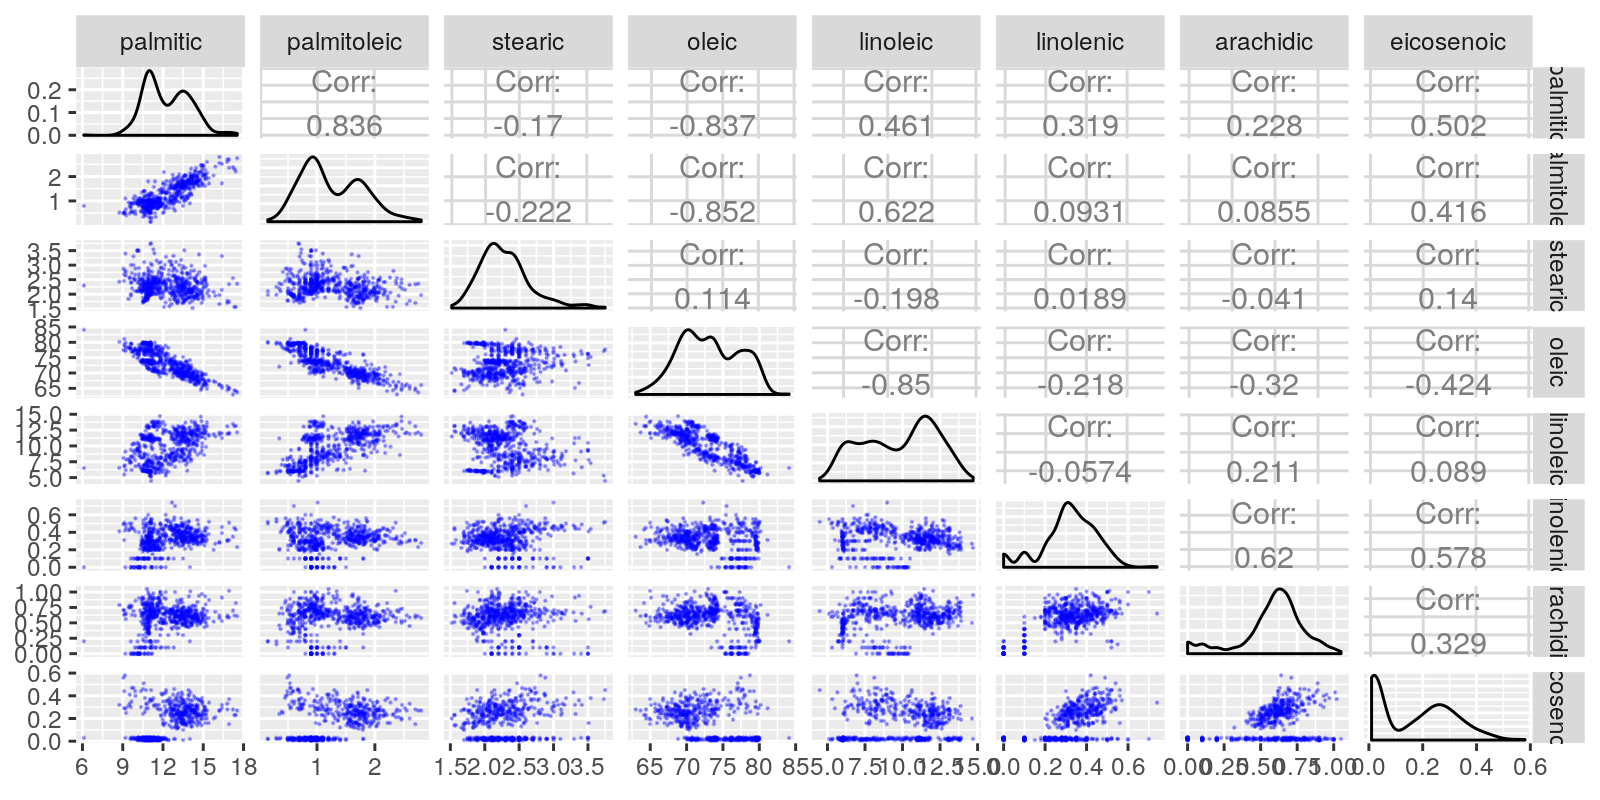

In [21]:
library(GGally)
options(repr.plot.height=4,repr.plot.width=8)
ggpairs(olive[,c("palmitic","palmitoleic","stearic","oleic","linoleic","linolenic","arachidic","eicosenoic")],
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )